In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
df = pd.read_csv('Mall_Customers.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [10]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male: 1 , Female: 0

In [13]:
df.drop('CustomerID', axis=1, inplace=True)

In [15]:
def segment(row):
    if row['AnnualIncome'] >= 70 and row['SpendingScore'] >= 60:
        return 2  # High-value
    elif row['AnnualIncome'] <= 40 and row['SpendingScore'] <= 40:
        return 0  # Low-value
    else:
        return 1  # Medium-value

In [16]:
df['Segment'] = df.apply(segment, axis=1)

In [17]:
X = df.drop('Segment', axis=1)
y = df['Segment']

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = knn.predict(X_test)

In [22]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
 [[ 3  0  0]
 [ 0 32  0]
 [ 0  0  5]]
Accuracy Score: 1.0


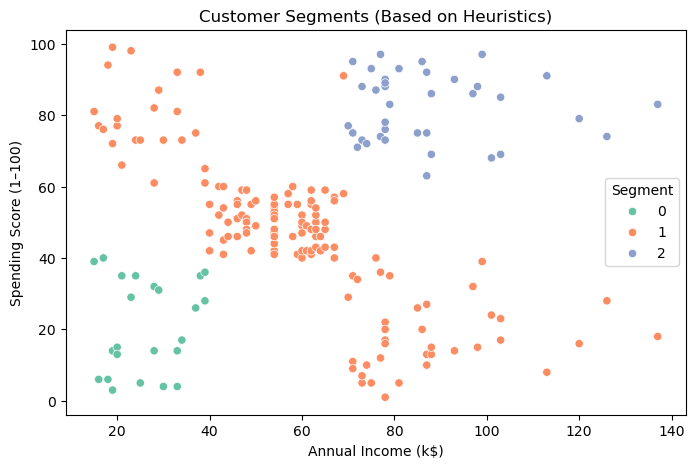

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['AnnualIncome'], y=X['SpendingScore'], hue=y, palette='Set2')
plt.title("Customer Segments (Based on Heuristics)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.show()

In [25]:
param_grid = {'n_neighbors': list(range(1, 21))}

In [26]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20]},
             scoring='accuracy')

In [27]:
print("Best K:", grid_search.best_params_['n_neighbors'])
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best K: 4
Best Cross-Validation Accuracy: 0.975


In [28]:
knn_best = KNeighborsClassifier(n_neighbors = 4)
knn_best.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [29]:
y_pred = knn_best.predict(X_test)

In [30]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00        32
           2       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
 [[ 3  0  0]
 [ 0 32  0]
 [ 0  0  5]]
Accuracy Score: 1.0


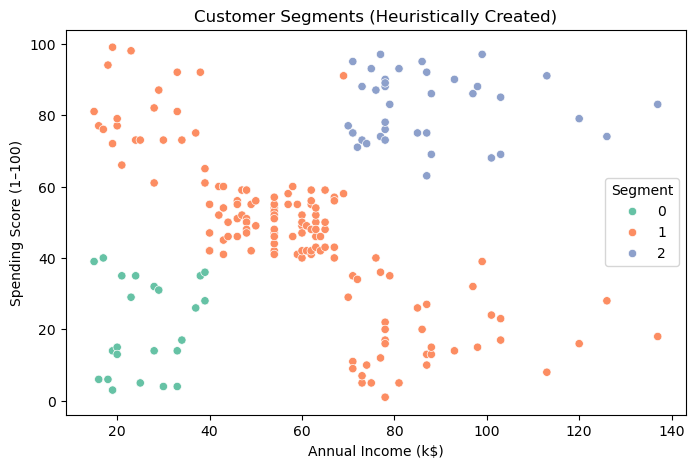

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['AnnualIncome'], y=X['SpendingScore'], hue=y, palette='Set2')
plt.title("Customer Segments (Heuristically Created)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.show()

In [32]:
import pickle

with open('model.pkl','wb') as file:
    pickle.dump(knn_best,file)

with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)